In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [2]:
input_mat = io.loadmat('/content/drive/MyDrive/Colab Notebooks/kalman_filter/11.ARS/ArsAccel.mat')

In [10]:
input_mat['fx']

array([[0.0390285 ],
       [0.02287908],
       [0.04441164],
       ...,
       [0.02287908],
       [0.03229884],
       [0.03364536]])

In [3]:
# 가속도계를 이용한 각가속도 측정
def get_accel(i):
    """Measure angular acceleration using accelerometer (G-meter)."""
    ax = input_mat['fx'][i][0]  # input_mat['fx']: (41500, 1)
    ay = input_mat['fy'][i][0]  # input_mat['fy']: (41500, 1)
    az = input_mat['fz'][i][0]  # input_mat['fz']: (41500, 1)
    return ax, ay, az

In [4]:
# 롤각과 피치각의 공식 유도
def accel2euler(ax, ay, az, phi, the, psi):
    """Calculate Euler angle (Pose Orientation)."""
    g = 9.8  # 9.8 [m/s^2]
    cosThe = np.cos(the)
    phi = np.arcsin(-ay / (g * cosThe))
    the = np.arcsin(ax / g)
    psi = psi
    return phi, the, psi

In [5]:
# Input parameters.
n_samples = 41500
dt = 0.01

In [6]:
time = np.arange(n_samples) * dt
phi_save = np.zeros(n_samples)
the_save = np.zeros(n_samples)
psi_save = np.zeros(n_samples)

In [7]:
phi, the, psi = 0, 0, 0
for i in range(n_samples):
    ax, ay, az = get_accel(i)
    phi, the, psi = accel2euler(ax, ay, az, phi, the, psi)    
    phi_save[i] = np.rad2deg(phi)
    the_save[i] = np.rad2deg(the)
    psi_save[i] = np.rad2deg(psi)

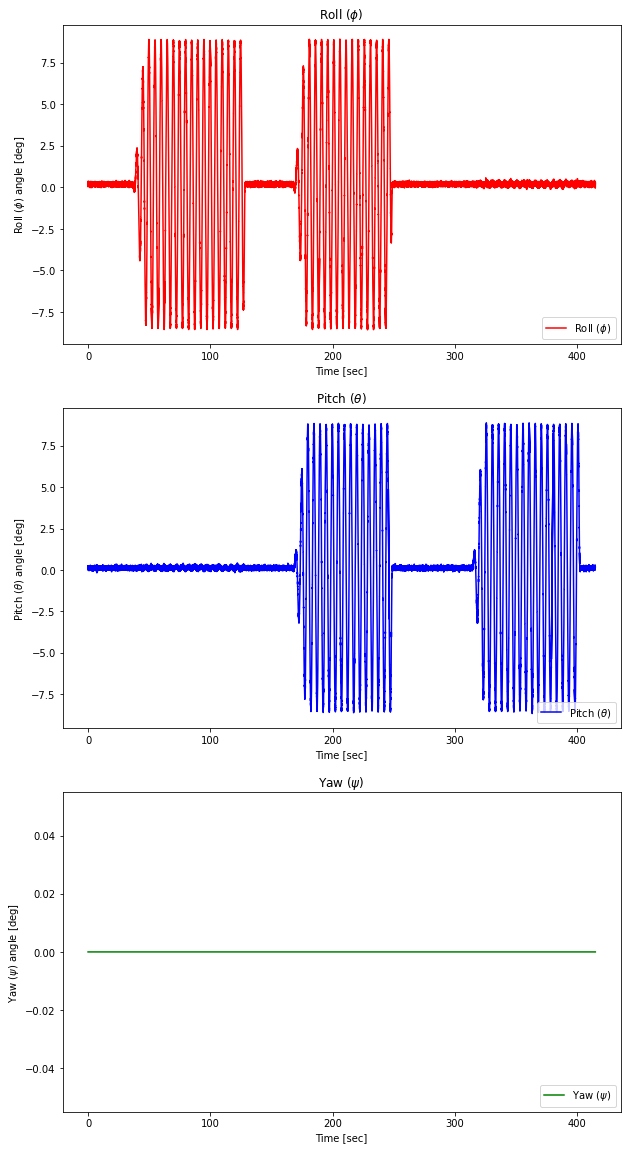

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.plot(time, phi_save, 'r', label='Roll ($\\phi$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Roll ($\\phi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Roll ($\phi$) angle [deg]')

plt.subplot(3, 1, 2)
plt.plot(time, the_save, 'b', label='Pitch ($\\theta$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Pitch ($\\theta$)')
plt.xlabel('Time [sec]')
plt.ylabel('Pitch ($\\theta$) angle [deg]')

plt.subplot(3, 1, 3)
plt.plot(time, psi_save, 'g', label='Yaw ($\\psi$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Yaw ($\\psi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Yaw ($\\psi$) angle [deg]')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/kalman_filter/11.ARS/pose_orientation_accel.png')